# Load Packages

In [1]:
pip install scikeras

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from PIL import Image
import glob
from keras.callbacks import ModelCheckpoint

# Define DataSet

In [3]:
num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)

#Define Model Proportion of Validation and Test

In [4]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(Dense(100, activation = 'selu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
test_portion = 0.1
model.save("model.keras")
history_1 = []
while test_portion <= 0.9:
  X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=test_portion, random_state=42)
  model = keras.saving.load_model("model.keras")
  model.fit(X_train, y_train, epochs=100, batch_size = 10, verbose=0)
  predict_train = model.predict(X_train)
  predict_test = model.predict(X_test)
  history_1.append([X_train, predict_train, X_test, predict_test])
  test_portion += 0.1
model.save('Model.keras')

4/4 [==============================] - 0s 3ms/step


7/7 [==============================] - 0s 3ms/step


10/10 [==============================] - 0s 2ms/step


13/13 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 2ms/step


19/19 [==============================] - 0s 2ms/step


22/22 [==============================] - 0s 2ms/step


25/25 [==============================] - 0s 1ms/step


29/29 [==============================] - 0s 2ms/step


# Model Gif

In [8]:
def make_gif(frame_folder, gif_name="change_proportion.gif", duration=500):
    # Create a list of image file paths
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]

    # Ensure there's at least one frame
    if not frames:
        raise ValueError("No images found in the specified directory.")

    # Save the frames as a GIF
    frames[0].save(
        gif_name,
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=0
    )

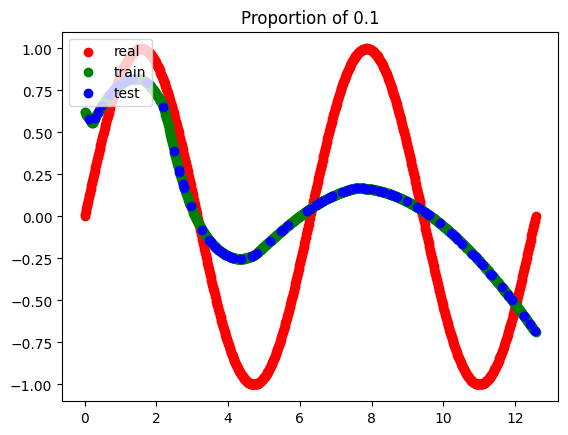

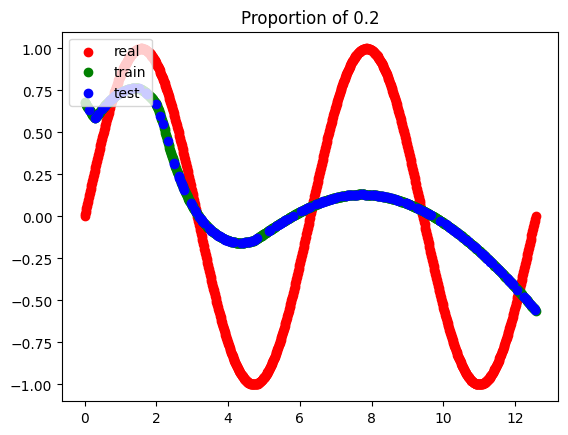

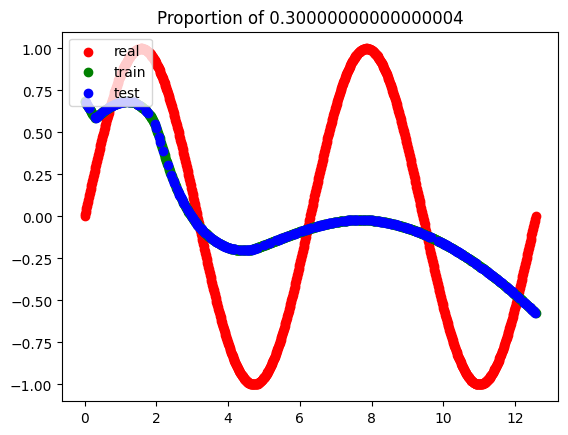

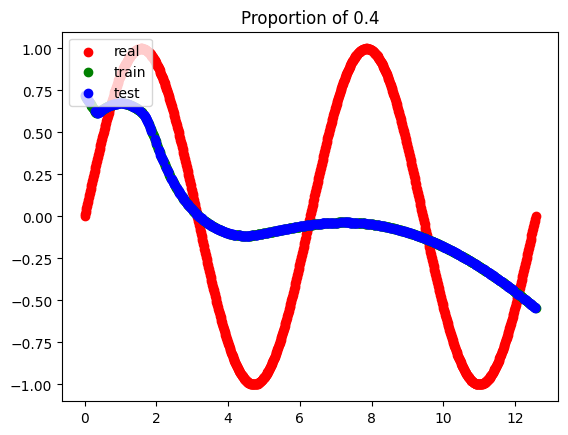

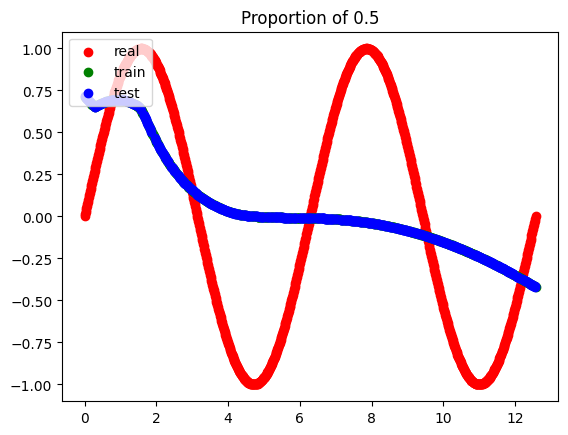

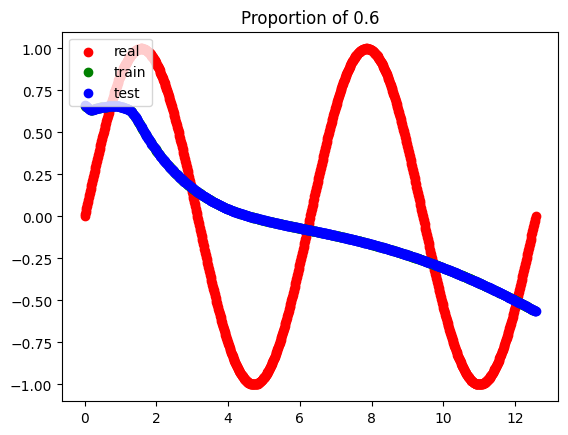

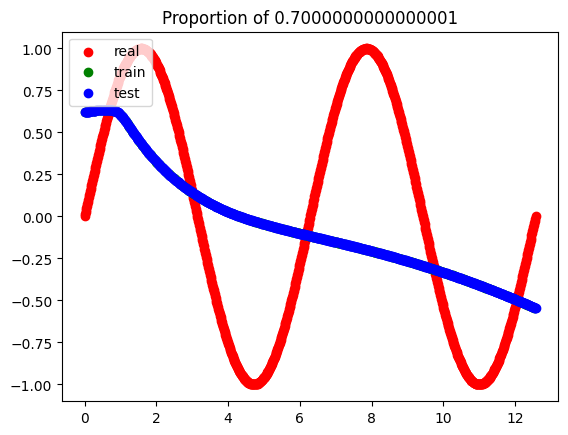

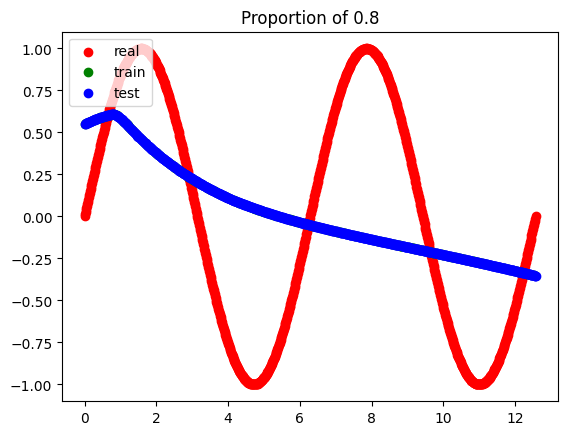

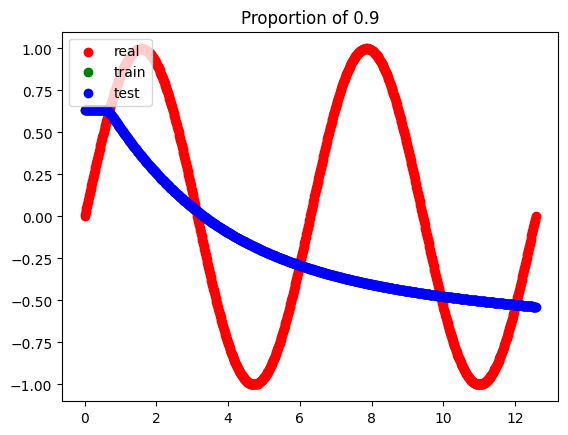

In [28]:
for i in range(len(history_1)):
  fig, ax = plt.subplots()
  ax.clear()
  x_main = x_values
  y_main = y_values
  ax.scatter(x_main, y_main, color = 'red', label = 'real')
  ax.scatter(history_1[i][0], history_1[i][1], color = 'green', label = 'train')
  ax.scatter(history_1[i][2], history_1[i][3], color = 'blue', label = 'test')
  plt.title(f'Proportion of {0.1 + 0.1 * i}')
  plt.legend(loc = 'upper left')
  plt.savefig(f'./proportion/{i}z')
make_gif('./proportion')


# Define Model Changing Number of Layers

In [14]:
number_of_layers = 1
test_portion =  0.1
X_train, X_test, y_train, y_test = train_test_split(
        x_values, y_values, test_size=test_portion, random_state=1)
number_of_neurons = 5
history_2 = []
model = Sequential()
model.add(Dense(1, input_shape = (1, ), activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, batch_size=16, verbose=0)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
history_2.append([X_train, predict_train, X_test, predict_test])
number_of_layers += 1
while number_of_layers<=20:
  model = Sequential()
  model.add(Dense(number_of_neurons, activation = 'tanh', input_shape = (1, )))
  model.add(BatchNormalization())
  for i in range(number_of_layers-2):
    model.add(Dense(number_of_neurons, activation = 'tanh'))
    model.add(BatchNormalization())
  model.add(Dense(1, activation='tanh'))
  model.compile(optimizer='adam', loss='mean_squared_error')
  mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')
  model.fit(X_train, y_train, epochs = 100, batch_size=16, verbose=0, callbacks = [mcp_save])
  model.load_weights('.mdl_wts.hdf5')
  predict_train = model.predict(X_train)
  predict_test = model.predict(X_test)
  history_2.append([X_train, predict_train, X_test, predict_test])
  number_of_layers += 1

4/4 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 4ms/step


# Model Gif

In [ ]:
import os

path = r"./layer/"
for file_name in os.listdir(path):
    # construct full file path
    file = path + file_name
    print(file)
    if os.path.isfile(file):
        print('Deleting file:', file)
        os.remove(file)

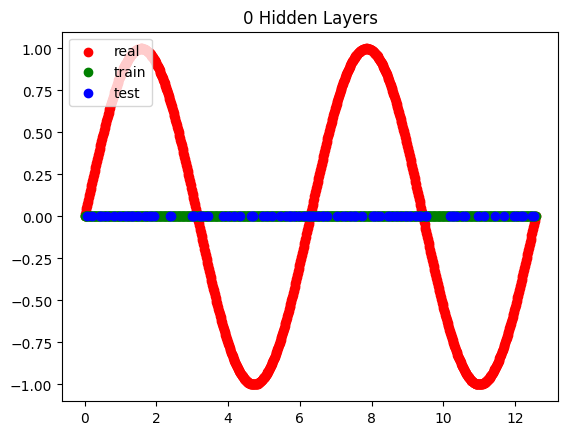

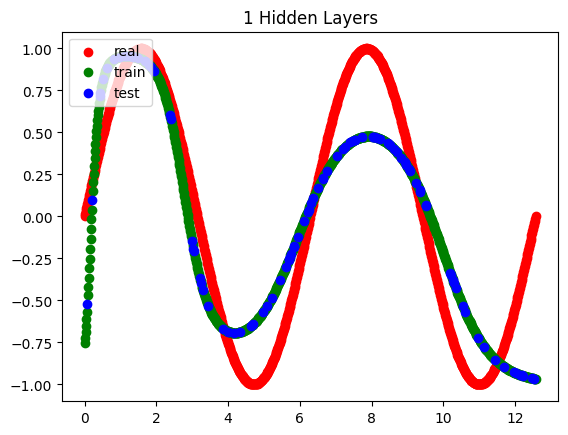

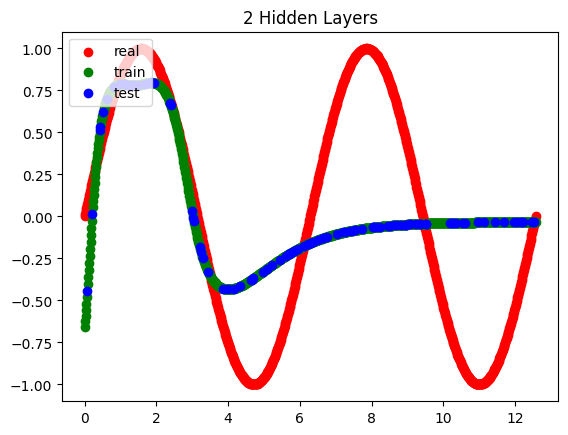

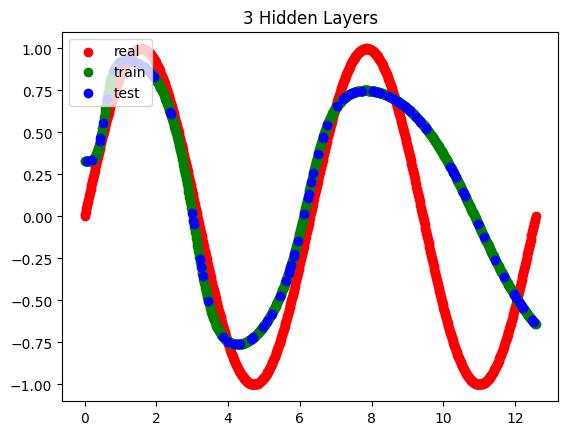

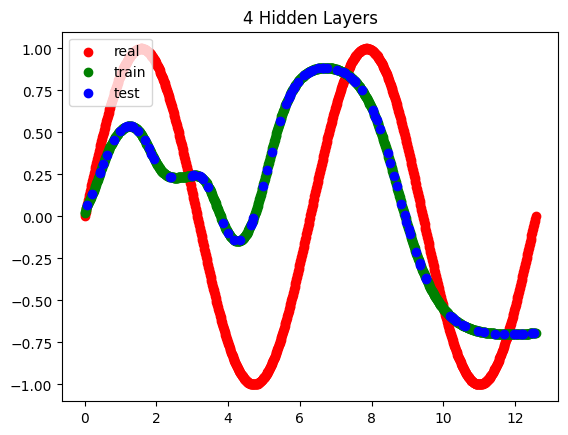

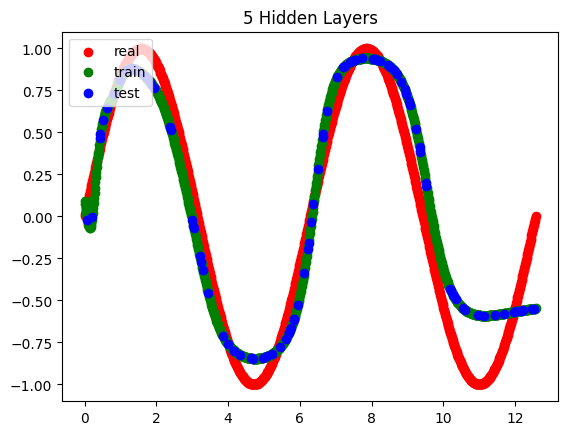

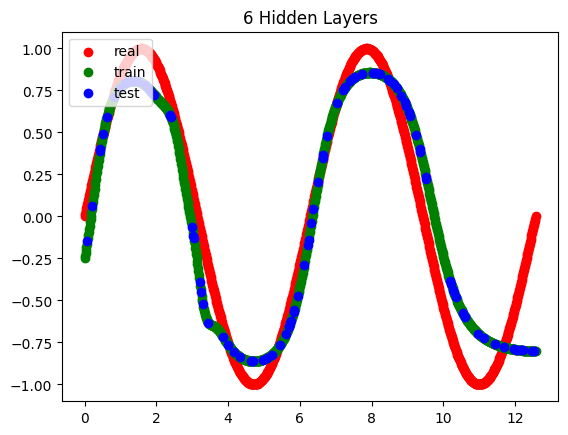

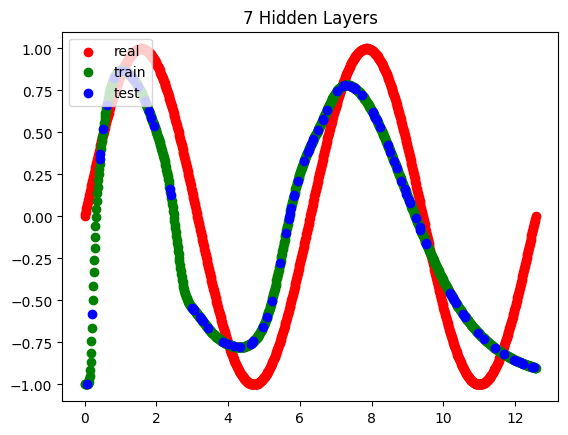

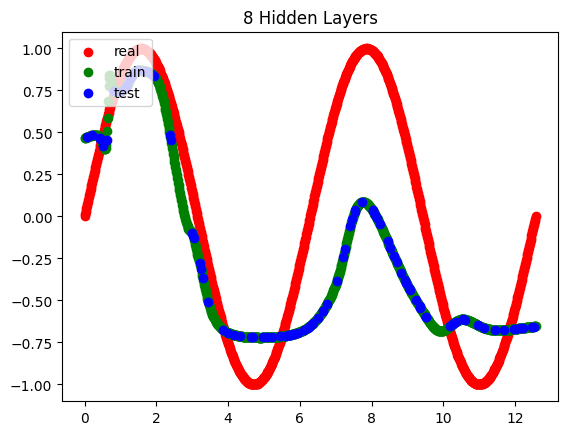

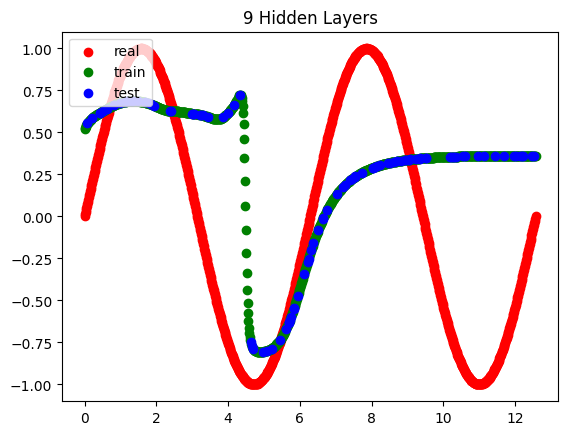

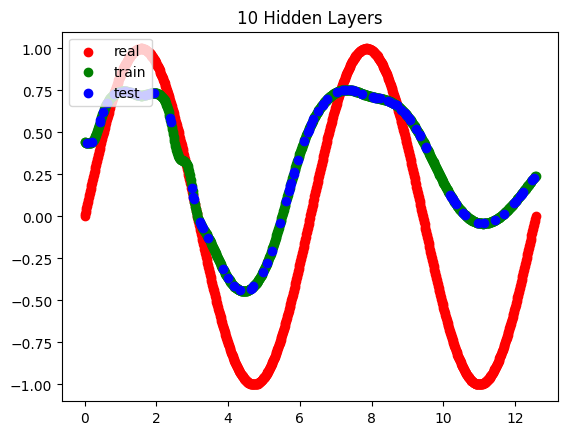

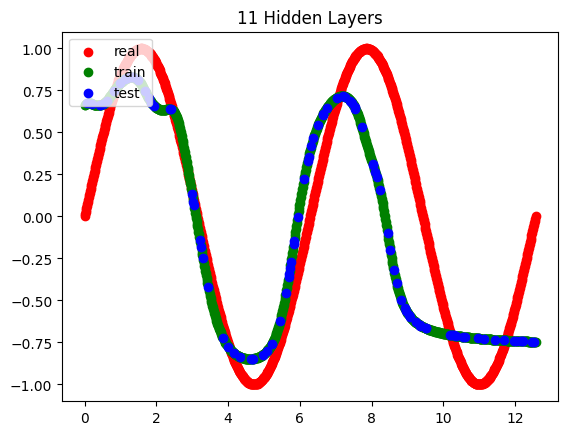

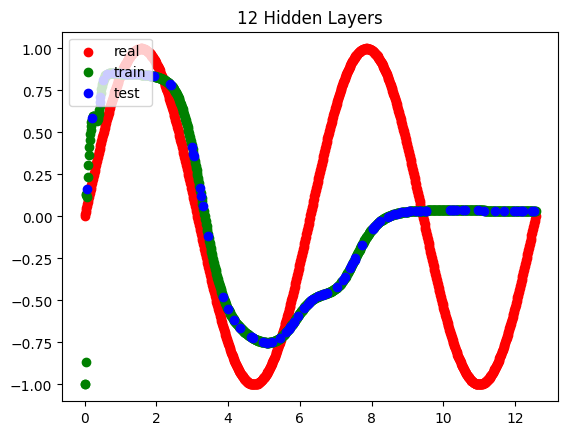

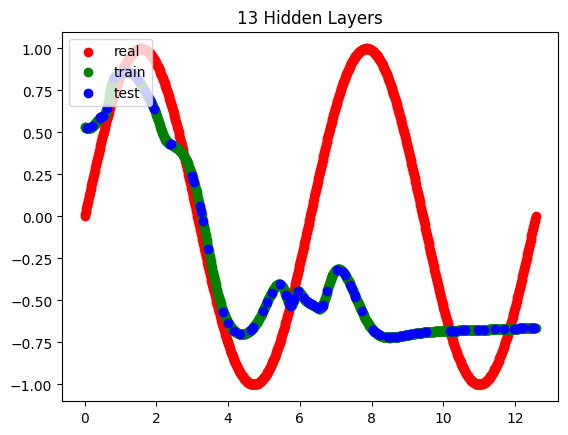

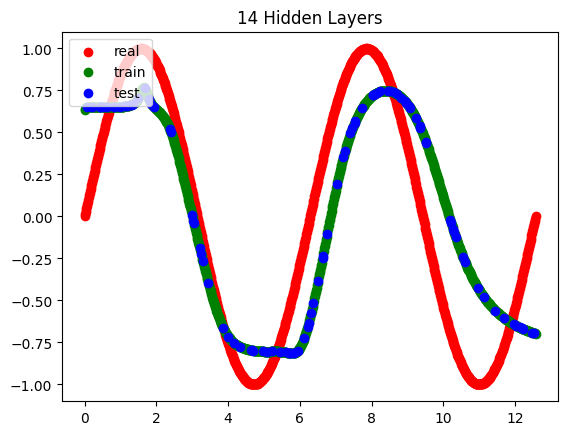

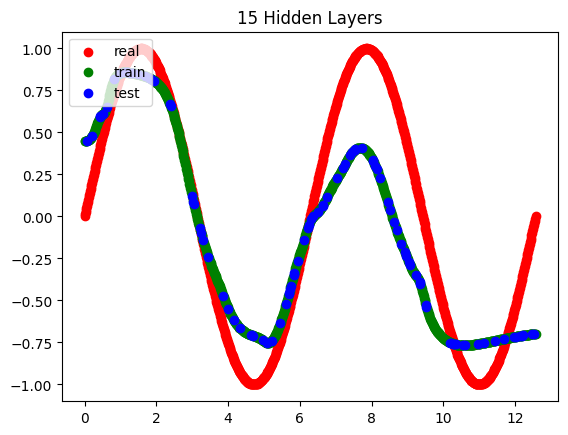

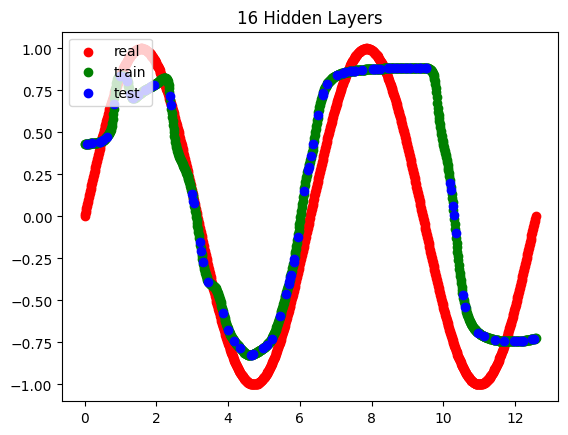

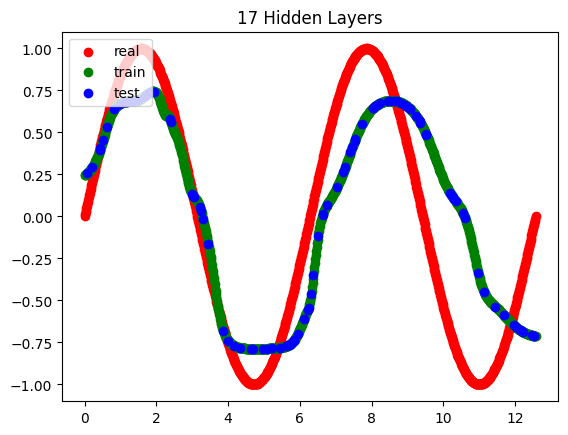

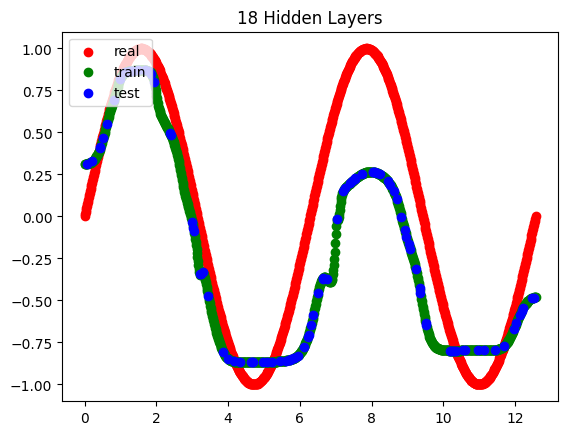

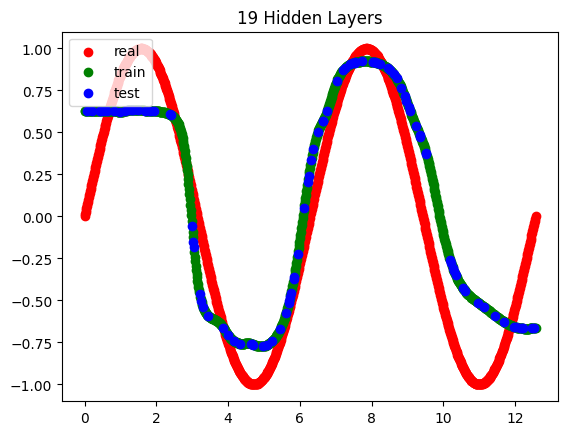

In [27]:
for i in range(len(history_2)):
  fig, ax = plt.subplots()
  ax.clear()
  x_main = x_values
  y_main = y_values
  ax.scatter(x_main, y_main, color = 'red', label = 'real')
  ax.scatter(history_2[i][0], history_2[i][1], color = 'green', label = 'train')
  ax.scatter(history_2[i][2], history_2[i][3], color = 'blue', label = 'test')
  plt.title(f'{i} Hidden Layers')
  plt.legend(loc = 'upper left')
  plt.savefig(f'./layer/{i}')
make_gif('./layer', gif_name = 'Change_layers.gif')

# Grid Search for Number of Layers

In [24]:
def create_model(layers):
    # Create model
    model = Sequential()
    for i in range(layers):
        if i == 0:
            # Input layer
            model.add(Dense(number_of_neurons, input_shape = (1, ), activation = 'relu'))
        else:
            # Hidden layers
            model.add(Dense(number_of_neurons, activation='tanh'))
            model.add(BatchNormalization())
    model.add(Dense(1, activation='tanh'))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(model=create_model)
param_grid = {
    'model__layers': list(range(1, 21, 4))
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train.reshape(-1, 1) , y_train.reshape(-1, 1) , epochs=70, batch_size=16, verbose=0)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

10/10 [==============================] - 0s 3ms/step
Best: 0.600225 using {'model__layers': 13}
